# 趋势型征兆识别  
训练函数定义 trend_training:
输入：

    hist_data : pandas.list     
    window_lengthe: time
    trend_type: str
    hts: 
输出:

    dictionary:{window_length: time;
            trend_type: str
            hts : float
            htc: float
            
            simulation: pandas.list
            }
识别函数定义 trend_identify:
输入：  

    data ： pandas.list
    window_length: time
    I : float
    h2 : float
输出：  
    
    trend_present: True, False

# 训练函数定义

In [1]:
#所需函数包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
import statsmodels.tsa.stattools as ts 

E:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


![image.bmp](picture/trend1.bmp)
![image.bmp](picture/trend2.bmp)   
|I| < hts 则认为平稳   
|Id|< htc 则认为两片段连续   
|Id|> htc & |Is|<hts  则认为突变后平稳   

htc 经验给定   
hts 历史数据统计获得

In [3]:
def trend_training(hist_data, window_length,  hts):
    #历史数据判断是否稳定
    steady_value = ts.adfuller(hist_data.values)
    if steady_value[0]<steady_value[4]['1%']:
        
        trend ='steady'
        
    else:
        return '历史数据存在变化趋势'
    
    #采3sigma法估计趋势阈值h2,h3
    sigma = hist_data.values.std()
    htc = 3*sigma
    
    #仿真真趋势数据
    sim_len = len(hist_data)
    slope = h1/window_length #!!!
    sim_data= pd.DataFrame(columns=['original'],data=hist_data.values, index=hist_data.index)
    sim_data['simdata']= np.ones(len(hist_data))
    sim_data['simdata'][0]=hist_data.mean()
    
    t1 = sim_data.index[0]
    for i in range(1,sim_len):
        
        t2 =sim_data.index[i]
        delta_t = (t2 - t1).seconds
        sim_data.loc[t2]['simdata']=sim_data.loc[t1]['simdata']+slope*delta_t
        t1=sim_data.index[i]
    plt.plot(sim_data)
    print(sim_data.head())
    return {"window":window_length,'hts':hts,'htc':htc},sim_data

    
    
    
    
    
def trend_identify(data,hts,htc):
#     steady_value = ts.adfuller(data.values)
#     if steady_value[0]<steady_value[4]['1%']:
#         trend ='steady'
#         return trend
# 定义片段矩阵，【起始位置，值，结束位置，值】
    trend_slices=[]
    trend_names ={}
    trend_slices.append({data.index[0]:data[0],data.index[1]:data[1]})

#当前片段起始和结束时刻
    current_index_start = data.index[0]
    current_index_end = data.index[1]
    i=1

#判断最前面两个点的趋势类型：
    if abs(data[0]-data[1])<htc:
        trend_names[trend_slices[0].keys()]='steady'


    while current_index<data.index[-1]:
        i+=1

        #判断新点与前一片段是否连续

        if abs(data[i]-list(trend_slices[-1].values())[1])<htc： #dict_value 取出值在python3中要强制转换为list才能继续取值。
            #表示新点与当前片段连续,当前点记入当前片段，作为最后一个点
            # 1 去除当前片段旧末尾值
            trend_slices[-1].pop(list(trend_slices[-1].keys())[1])
            # 2 将新点作为末尾值
            trend_slices[-1][current_index]=data[i]
            #计算当前片段的最后一个值与前一片段最后一个值的差，是否>hts
            if len(trend_slices)==1:
                I = list(trend_slices[0].values())[1]-list(trend_slices[0].values())[0]
                if abs(I) <hts:
                    trend_names.update({list(trend_slices[0].keys()):trend_names.pop(trend_names.keys())})
                else:
                    trend_names.pop(trend_names.keys())
                    if I>0:
                        trend_names.update({list(trend_slices[0].keys()):'teady_up'})
                    else:
                        trend_names.update({list(trend_slices[0].keys()):'teady_down'})
            else :
                I =list(trend_slices[-1].values())[1]-list(trend_slices[-2].values())[1]
                #当两个片段的末尾值相差<hts,表示当前片段段没有明前趋势变化，并判断为平稳
                if abs(I) < hts:
                    trend_names.updata()



        if abs(data[i]-list(trend_slices[-1].values())[1])>=htc：
            #表示新点与前一片段不连续



    
    
    

SyntaxError: invalid character in identifier (<ipython-input-3-c4dc22f18706>, line 63)

In [154]:
dict={'a':1, 'b':2}
 
dict["c"] = dict.pop("a")
dict.pop(list(dict.keys())[1])
dict.update({1:'steady'})
dict

{1: 'steady', 'b': 2}

In [149]:
a = []
a.append({test_data.index[0]:test_data[0],test_data.index[1]:test_data[1]})
list(a[-1].keys())[1]
test_data.index[0]

Timestamp('2018-01-01 00:00:00', freq='5S')

In [ ]:
trend_training(train_data,500,0.5)

In [45]:
# train data building
rng = pd.date_range('1/1/2018',periods=1000,freq='5S')
rng
a = np.random.randn(1000)
a[0:200]=a[0:200]+np.ones(200)*2
a[200:500]=a[200:500]+np.linspace(2.01,5,300)
a[500:1001]=a[500:1001]+np.ones(500)*5
test_data = pd.Series(a,index=rng)
train_data = pd.Series(np.random.randn(1000),index=rng)

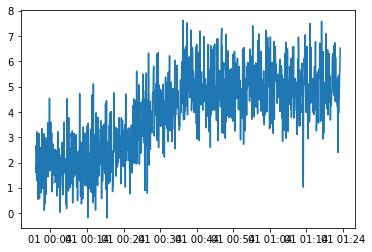

In [3]:
plt.plot(test_data)

In [83]:
test_data[0:4].mean()

2.06628958457818

In [30]:
test_data.head()
sim_data= pd.DataFrame(columns=['original'],data=test_data.values,index=test_data.index)

sim_data['simdata']=np.ones(len(test_data))
sim_data.loc(sim_data.index[1])

ValueError: No axis named 2018-01-01 00:00:05 for object type <class 'pandas.core.frame.DataFrame'>

In [41]:
t1 =sim_data.index[1]
# sim_data.loc[ti]['simdata']=2
# sim_data.loc[ti]['simdata']
t2 =sim_data.index[2]
(t2-t1).seconds

5

In [103]:
sim_data= pd.DataFrame(columns=['data','data2'],data=np.array(test_data.values,[3]) )
print(sim_data)

TypeError: data type not understood

In [106]:
data=np.array(test_data.values,[3])
data.shape

TypeError: data type not understood

# 平稳性检验

In [46]:
import statsmodels.tsa.stattools as ts
result = ts.adfuller(test_data.values[500:1000])


In [55]:
result[4]['1%']

-3.4435228622952065

In [ ]:
time_stamp = pd.Time_range

In [ ]:
time_stamp = pd.Timerange

In [ ]:
time_stamp = pd.Timestamp

In [ ]:
time_stamp = pd.timedelta_range